### Visualization for self-reports ###

In [2]:
# IMPORTING MODULES
import glob
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.signal as ss
import seaborn as sb
import sys
module_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(module_path)
import tools.data_reader_apd as dr_a
import tools.data_reader_ascertain as dr_asc
import tools.data_reader_case as dr_c
import tools.data_reader_wesad as dr_w
import tools.data_reader_popane as dr_p
import tools.display_tools as dt
import train

## APD 

In [18]:
# APD
importlib.reload(dr_a)
importlib.reload(train)

threshold = "fixed"
participant_file = os.path.join(dr_a.Paths.DATA_DIR, "participants_details.csv")
df = pd.read_csv(participant_file)
labels = [
    "Baseline_SUDS", "BugBox_Relax_SUDS", "BugBox_Preparation_SUDS", "BugBox_Exposure_SUDS", "BugBox_Exposure_SUDS", 
    "Speech_Relax_SUDS", "Speech_SUDS", "Speech_Exposure_SUDS", "Speech_Break_SUDS"
]
suds_labels = df.loc[:, ["Participant"] + labels]
mean_suds = np.mean(suds_labels.loc[:, labels])

ha_suds_df = suds_labels.loc[suds_labels['Participant'].isin(dr_a.Groups.ha_participant_indices)]
la_suds_df = suds_labels.loc[suds_labels['Participant'].isin(dr_a.Groups.la_participant_indices)]

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


In [ ]:
fig, axs = plt.subplots(7, 4, sharex=True, sharey=True)
fig.set_size_inches(12, 12)
idx = 0
for i in range(7):
    for j in range(4):
        try:
            sb.histplot(ax=axs[i, j], data=ha_suds_df[labels].iloc[idx], stat="count", binwidth=10, binrange=[0, 100])
            # axs[i][j].hist(ha_suds_df[labels].iloc[idx], bins=list(range(0, 100, 10)))
            # axs[i][j].set_title(ha_suds_df["Participant"].iloc[idx], fontdict={"fontsize": 8})
        except Exception as e:
            continue
        idx += 1
print("APD self-reports -- high trait anxiety group")
fig.show()

fig2, axs2 = plt.subplots(7, 4, sharex=True, sharey=True)
fig2.set_size_inches(12, 12)
idx = 0
for i in range(7):
    for j in range(4):
        try:
            sb.histplot(ax=axs2[i, j], data=la_suds_df[labels].iloc[idx], stat="count", binwidth=10, binrange=[0, 100])
            # axs2[i][j].hist(la_suds_df[labels].iloc[idx], bins=list(range(0, 100, 10)))
            # axs2[i][j].set_title(la_suds_df["Participant"].iloc[idx], fontdict={"fontsize": 8})
        except Exception as e:
            continue
        idx += 1
print("APD self-reports -- low trait anxiety group")
fig2.show()

## WESAD

In [ ]:
# WESAD
importlib.reload(dr_w)
importlib.reload(train)

stai_labels = dr_w.get_stai_scores()
labels = [
    "Base_STAI", "TSST_STAI", "Medi_1_STAI", "Fun_STAI", "Medi_2_STAI"
]
fig, axs = plt.subplots(5, 3, sharex=True, sharey=True)
fig.set_size_inches(12, 12)
idx = 0
for i in range(7):
    for j in range(4):
        try:
            sb.histplot(ax=axs[i, j], data=stai_labels[labels].iloc[idx], stat="count", binwidth=10, binrange=[20, 80])
            # axs[i][j].hist(stai_labels[labels].iloc[idx], bins=list(range(20, 80, 10)))
            axs[i][j].set_title(f"P{stai_labels['subject'].iloc[idx]}", fontdict={"fontsize": 8})
        except Exception as e:
            continue
        idx += 1
print("WESAD self-reports")
fig.show()

## ASCERTAIN

In [ ]:
# ASCERTAIN
importlib.reload(dr_asc)
importlib.reload(train)

self_reports = dr_asc.get_self_reports(dr_asc.SelfReports.AROUSAL)
self_reports = self_reports.drop(labels="subject", axis=1)
labels = []
for c in range(self_reports.shape[1]):
    labels += self_reports.iloc[:, c].tolist()
labels = pd.DataFrame(data=labels)

fig = plt.figure()
axs = plt.axes()

sb.histplot(ax=axs, data=labels, stat="count", binwidth=1, binrange=[0, 6])
axs.set_title("ASCERTAIN arousal labels", fontdict={"fontsize": 12})

fig.show()

## CASE

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


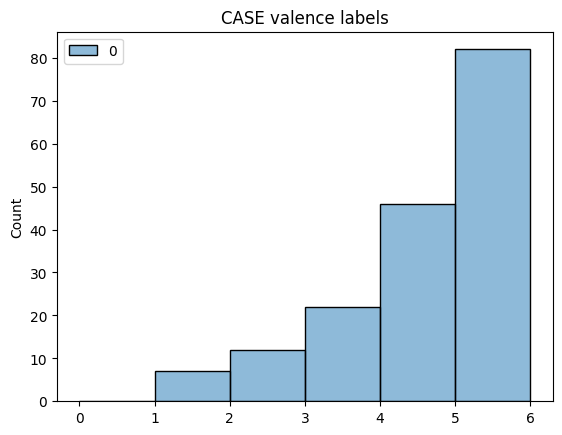

In [5]:
# CASE
importlib.reload(dr_asc)
importlib.reload(train)

self_reports = dr_c.get_self_reports(dr_c.SelfReports.VALENCE)
self_reports = self_reports.drop(labels="subject", axis=1)
labels = []
for c in range(self_reports.shape[1]):
    labels += self_reports.iloc[:, c].tolist()
labels = pd.DataFrame(data=labels)

fig = plt.figure()
axs = plt.axes()

sb.histplot(ax=axs, data=labels, stat="count", binwidth=1, binrange=[0, 6])
axs.set_title("CASE valence labels", fontdict={"fontsize": 12})

fig.show()

## POPANE

In [ ]:
# POPANE
importlib.reload(dr_p)
importlib.reload(train)

studies = list(range(1, 8))
for study in studies:
    study = f"Study{study}"
    self_report_df = pd.read_csv(os.path.join(dr_p.Paths.METRICS, study, "self_reports.csv"), index_col=0)
    labels = self_report_df.columns[1:]
    fig, axs = plt.subplots(5, 3, sharex=True, sharey=True)
    fig.set_size_inches(9, 9)
    idx = 0
    for i in range(7):
        for j in range(4):
            try:
                sb.histplot(ax=axs[i, j], data=self_report_df[labels].iloc[idx], stat="count", binwidth=1, binrange=[0, 10])
                # axs[i][j].hist(self_report_df[labels].iloc[idx], bins=list(range(0, 10, 1)))
                axs[i][j].set_title(self_report_df["subject"].iloc[idx], fontdict={"fontsize": 8})
                # axs[i][j].set_yticks(list(range(0, 7, 2)))
            except Exception as e:
                continue
            idx += 1
    print(f"POPANE Study {study[-1]} self-reports")
    fig.show()

## Visualizing labels

In [150]:
importlib.reload(train)
importlib.reload(dr_a)
importlib.reload(dr_w)
importlib.reload(dr_p)

apd_suds_labels = dr_a.get_suds_labels(threshold=threshold)
wesad_stai_labels = dr_w.get_stai_labels(threshold=threshold)
popane_affect_labels = {
    "Study1": [],
    "Study2": [],
    "Study3": [],
    "Study4": [],
    "Study5": [],
    "Study6": [],
    "Study7": []
}

popane_phases = {
    "Study1": dr_p.Study1.ALL,
    "Study2": dr_p.Study2.ALL,
    "Study3": dr_p.Study3.ALL,
    "Study4": dr_p.Study4.ALL,
    "Study5": dr_p.Study5.ALL,
    "Study6": dr_p.Study6.ALL,
    "Study7": dr_p.Study7.ALL
}

for study in popane_affect_labels.keys():
    popane_affect_labels[study] = dr_p.get_affect_labels(study, popane_phases[study], threshold=threshold)

In [201]:
importlib.reload(train)

metrics = [
    train.Metrics.BPM, 
    train.Metrics.RMSSD, 
    train.Metrics.HF_RR, 
    train.Metrics.LF_RR, 
    train.Metrics.IBI, 
    train.Metrics.SDNN, 
    train.Metrics.MEAN_SCL, 
    train.Metrics.SCR_RATE
]

study = "Study5"
x, y = train.Train_POPANE.get_popane_data(study, metrics, popane_phases[study])
nan_idx = y.index[y["label"].isnull()]
print(x.iloc[nan_idx, :])
print(y.iloc[nan_idx, :])

SELF-REPORTS
Empty DataFrame
Columns: [subject, Anger1, Anger2, Anger3, Neutral1, Neutral6, Neutral7, Amusement2, Amusement3, Amusement4]
Index: []
     subject  phaseId       bpm     rmssd     hf_rr     lf_rr       ibi  \
592    295.0        8  0.558796  0.331706  0.000071  0.000071  0.282630   
593    297.0        8  0.327605  0.102485  0.008411  0.008437  0.391457   

         sdnn  mean_SCL  SCR_rate  
592  0.424319  0.111713  0.291391  
593  0.363321  0.057413  0.145695  
     subject  label
592    295.0    NaN
593    297.0    NaN
